In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
 import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, extract

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station
measurement = Base.classes.measurement

In [7]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [8]:
 inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
    
rows = inspector.get_columns('station')
for r in rows:
    print(r['name'], r["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Latest Date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [10]:
# Latest Date
#str_dec= "2017"
#query_date = x - dt.timedelta(month=12)
#print("Query Date: ", query_date)
#results= session.query(measurement.date,measurement.prcp).\
   #filter(extract('year', measurement.date)==2017).filter(extract('year', measurement.date)==2016).all()
#results= session.query(measurement.date,measurement.prcp).\
   #filter(measurement.date <= '2017-08-23', measurement.date >= '2016-08-23').all()
    
    
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

results



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [11]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
 
    
#df.set_index('date')
df.sort_values(by=['date'])

df.count()
af = df[['date', 'prcp']].head(20)
af

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


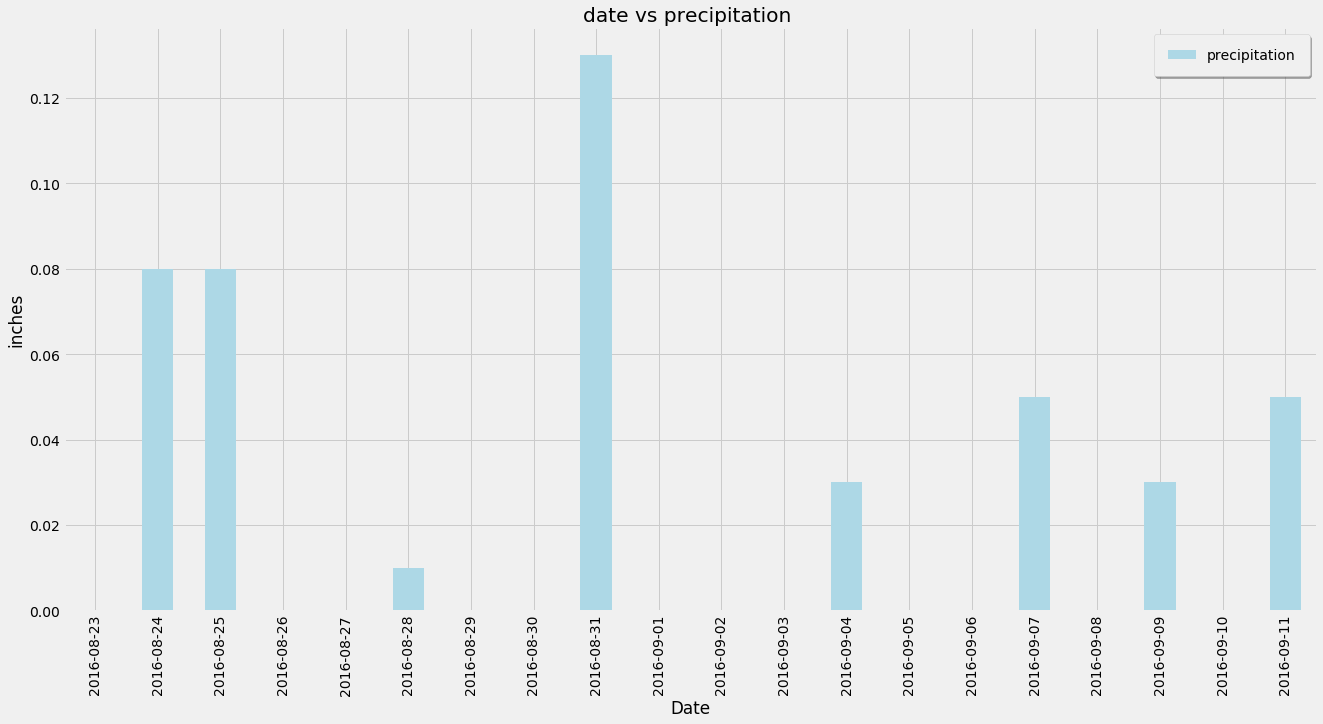

In [12]:
#df.plot.bar(x='date', y='prcp', rot=0)
#df.plot(kind='bar',x= 'date',y= 'prcp')

multi_plot = af.set_index('date').plot(kind="bar" , figsize=(20,10),color="lightblue", label="date and prcp values")

#PandasPlot.set_xticklabels() can be used to set the tick labels as well
#multi_plot.set_xticklabels( , rotation=45)

Gender = [ 'precipitation']
plt.legend(Gender, loc="best",fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)
plt.xlabel("Date")
plt.ylabel("inches")
plt.title("date vs precipitation ")
plt.show() 
#plt.tight_layout()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

af.describe()

,prcp
count,18.000000
mean,0.025556
std,0.038229
min,0.000000
25%,0.000000
50%,0.000000
75%,0.045000
max,0.130000


In [26]:
#how many stations are available ?

#session.execute('select count(*) from station;')
provoked = session.query(station).count()
printf'the no of stations in the dataset are {provoked}'

SyntaxError: invalid syntax (<ipython-input-26-c9f285a99aef>, line 5)

In [15]:
#List the stations and observation counts in descending order.

session.query(station.station,func.count(measurement.tobs)).group_by(station.station).\
   order_by(station.station.desc()).all()

#session.execute(station.station,measurement.tobs).fetchall()

[('USC00519523', 19550),
 ('USC00519397', 19550),
 ('USC00519281', 19550),
 ('USC00518838', 19550),
 ('USC00517948', 19550),
 ('USC00516128', 19550),
 ('USC00514830', 19550),
 ('USC00513117', 19550),
 ('USC00511918', 19550)]

In [16]:
#Which station has the highest number of observations?
 # What are the most active stations? (i.e. what stations have the most rows)?

#print(" highest  no of observation is 19550")

#print("station with most rows may be USC00511918")


 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#session.execute("select min(tobs) from station where station = "USC00519523" inner join measurement
                #on station.station = measurement.station").all()

SyntaxError: invalid syntax (<ipython-input-16-6c8e6357801f>, line 10)